# Lasso Regression

- Lasso Regression is a type of linear regression that improves model performance by removing unimportant features.
- It adds a penalty to the model for using too many features.
- This penalty can shrink the effect of some features to exactly zero, effectively removing them from the model.
- It helps prevent overfitting by simplifying the model.
- Lasso is useful for feature selection, making models easier to interpret and faster to run.
- **In short:**  
  `Lasso Regression = Linear Regression + Automatic Feature Elimination`

## Example:

Suppose we are trying to predict a student's exam score based on:

- Hours studied  
- Hours of sleep  
- Number of snacks eaten  
- Favorite color  
- Phone brand used  

A normal linear regression might include all these features. But clearly, some of them (like favorite color or phone brand) are not helpful.

**Lasso Regression** will assign zero weight to these unimportant features (like favorite color), effectively removing them from the model.  
This leaves us with only the most relevant predictors: hours studied and hours of sleep.

As a result, the model becomes simpler and more accurate.


# Importing data and dependencies

In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Data collection and Processing (Data Eyeballing) (Checking how the data looks like)

In [513]:
df=pd.read_csv("dataset.csv")

In [514]:
df.shape

(4340, 8)

In [515]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [516]:
df.sample(6)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3766,Tata New Safari DICOR 2.2 GX 4x2 BS IV,2012,450000,97000,Diesel,Individual,Manual,Second Owner
1160,Maruti Alto LX,2011,180000,36000,Petrol,Dealer,Manual,First Owner
747,Maruti 800 Std,2003,98000,54000,Petrol,Individual,Manual,First Owner
2959,Maruti Swift Dzire VDI,2014,380000,100000,Diesel,Individual,Manual,Second Owner
3627,Maruti Zen Estilo LXI BS IV,2011,229999,70000,Petrol,Individual,Manual,First Owner
2426,Hyundai i20 Magna Optional 1.2,2013,340000,35000,Petrol,Individual,Manual,First Owner


In [517]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [518]:
df.duplicated().sum()

np.int64(763)

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [520]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [521]:
number_df=df.select_dtypes(include='number')
number_df.corr()

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


<Axes: >

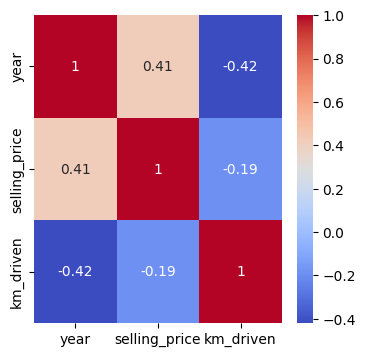

In [522]:
plt.figure(figsize=(4,4))
sns.heatmap(number_df.corr(),annot=True,cmap='coolwarm')


In [523]:
# checking the distribution of categorical data
print(df.fuel.value_counts())
print("\n")
print(df.transmission.value_counts())
print("\n")
print(df.seller_type.value_counts())
print("\n")
print(df.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


#### Encoding the Categorical Data 

In [524]:
# encoding "fuel" Column
df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
df.sample(8)

C:\Users\nisch\AppData\Local\Temp\ipykernel_52508\950101684.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
893,Hyundai Santro Xing XG eRLX Euro III,2006,90000,120000,1,Individual,Manual,Second Owner
4275,Mahindra XUV500 W8 2WD,2014,650000,218000,0,Individual,Manual,Second Owner
2262,Maruti Swift ZXI BSIV,2016,670000,7104,1,Trustmark Dealer,Manual,First Owner
990,Hyundai i10 Era 1.1 iTech SE,2011,147000,110000,1,Individual,Manual,Second Owner
1449,Mahindra XUV500 W8 2WD,2012,580000,70000,0,Individual,Manual,First Owner
2820,Maruti Ertiga VDI,2014,500000,100000,0,Individual,Manual,Second Owner
862,Maruti Swift Dzire LDI,2017,425000,90000,0,Individual,Manual,First Owner
3752,Hyundai EON LPG Magna Plus,2015,240000,110000,3,Individual,Manual,First Owner


In [525]:
# encoding "seller_type" Column
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)
df.sample(8)

C:\Users\nisch\AppData\Local\Temp\ipykernel_52508\368363633.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
229,Maruti SX4 Celebration Diesel,2012,285000,80000,0,0,Manual,Second Owner
3146,Mahindra Quanto C8,2013,300000,25000,0,0,Manual,Second Owner
2123,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2017,825000,35000,0,0,Manual,First Owner
3010,Mahindra TUV 300 mHAWK100 T8,2017,800000,60000,0,0,Manual,First Owner
3469,Tata Indica Vista Aqua 1.4 TDI,2010,110000,90000,0,0,Manual,Second Owner
4086,Mahindra Scorpio 2.6 Turbo 7 Str,2008,325000,120000,0,0,Manual,Second Owner
2430,Maruti Swift VDI BSIV,2016,595000,70000,0,0,Manual,First Owner
2403,Mahindra Xylo D2,2011,350000,140000,0,0,Manual,Second Owner


In [526]:
# encoding "transmission" Column
df.replace({'transmission':{'Automatic':0,'Manual':1}},inplace=True)
df.sample(8)

C:\Users\nisch\AppData\Local\Temp\ipykernel_52508\3932697312.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'transmission':{'Automatic':0,'Manual':1}},inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2251,Hyundai Santro GS,2005,80000,56580,1,1,1,First Owner
2786,Fiat Linea Emotion,2010,170000,100000,1,0,1,First Owner
784,Hyundai Verna 1.6 SX VTVT (O),2013,530000,89000,1,0,1,Second Owner
4066,Maruti Ertiga SHVS ZDI Plus,2017,940000,35000,0,1,1,First Owner
1198,Hyundai Grand i10 Asta,2014,341000,31491,1,0,1,First Owner
1248,Maruti Alto 800 LXI,2015,280000,15000,1,0,1,Second Owner
1712,Maruti Baleno Zeta 1.2,2017,641000,25000,1,0,1,First Owner
590,Renault Duster 85PS Diesel RxL,2013,450000,1000,0,1,1,Second Owner


In [527]:
# encoding "owner" Column
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
df.sample(8)

C:\Users\nisch\AppData\Local\Temp\ipykernel_52508\665490135.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
2241,Maruti SX4 Vxi BSIV,2012,225000,110000,1,0,1,1
2177,Hyundai Verna VTVT 1.6 AT SX Option,2017,1100000,10000,1,0,0,0
840,Maruti Ertiga VXI,2014,500000,35000,1,0,1,0
2278,Hyundai Accent CRDi,2006,170000,245244,0,0,1,3
1103,Ford EcoSport 1.5 TDCi Titanium BSIV,2018,950000,27620,0,1,1,0
3468,Maruti Wagon R LXI Minor,2007,130000,60000,1,0,1,2
147,Maruti Ciaz VDi Plus,2015,525000,100000,0,0,1,0
2104,Hyundai i20 Asta 1.4 CRDi,2014,370000,80000,0,0,1,1


In [528]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,1,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,1,1


# EDA


<Axes: >

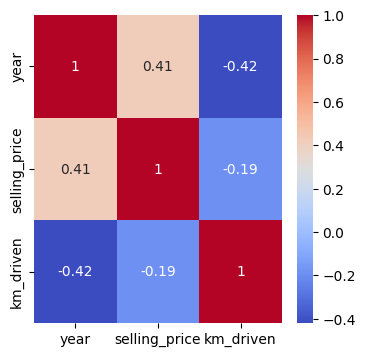

In [529]:
plt.figure(figsize=(4,4))
sns.heatmap(number_df.corr(), annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>,
        <Axes: title={'center': 'km_driven'}>],
       [<Axes: title={'center': 'fuel'}>,
        <Axes: title={'center': 'seller_type'}>,
        <Axes: title={'center': 'transmission'}>],
       [<Axes: title={'center': 'owner'}>, <Axes: >, <Axes: >]],
      dtype=object)

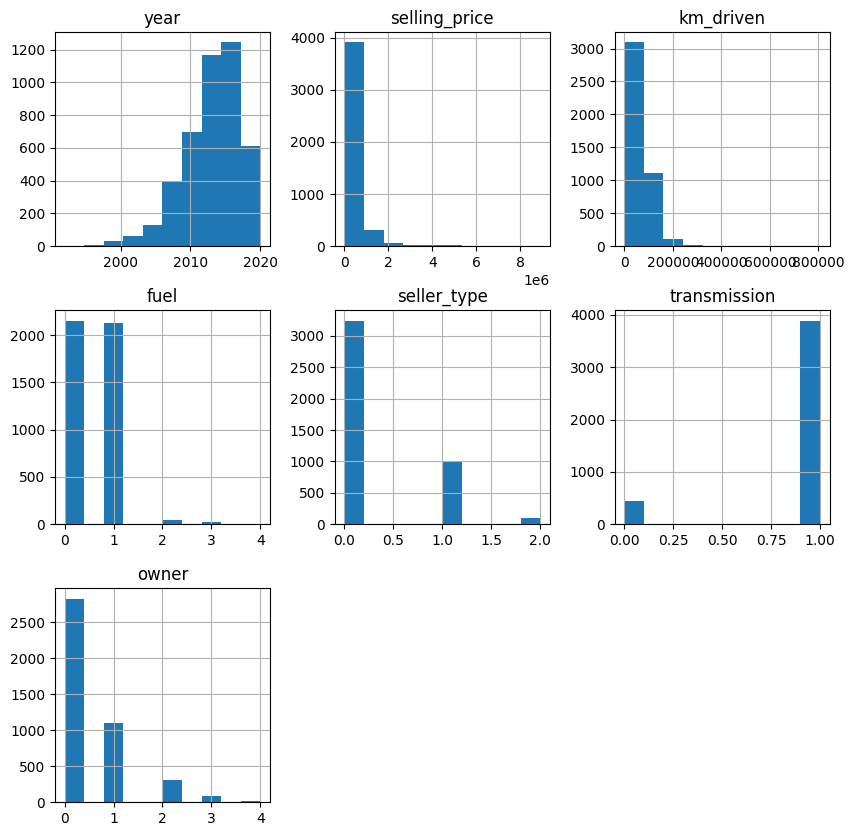

In [530]:
df.hist(figsize=(10,10))

# Splitting data into predictors and Target

In [531]:
X=df.drop(['name','selling_price'],axis=1)
y=df['selling_price']

In [532]:
X

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000,1,0,1,0
1,2007,50000,1,0,1,0
2,2012,100000,0,0,1,0
3,2017,46000,1,0,1,0
4,2014,141000,0,0,1,1
...,...,...,...,...,...,...
4335,2014,80000,0,0,1,1
4336,2014,80000,0,0,1,1
4337,2009,83000,1,0,1,1
4338,2016,90000,0,0,1,0


In [533]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

# Normalize or Scale the data

In [565]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [566]:
X_scaled

array([[-1.44507431,  0.08113906,  0.86482829, -0.5555905 ,  0.33927557,
        -0.63031847],
       [-1.44507431, -0.3476891 ,  0.86482829, -0.5555905 ,  0.33927557,
        -0.63031847],
       [-0.2587948 ,  0.7243813 , -0.95365755, -0.5555905 ,  0.33927557,
        -0.63031847],
       ...,
       [-0.97056251,  0.35987736,  0.86482829, -0.5555905 ,  0.33927557,
         0.7205863 ],
       [ 0.69022881,  0.50996722, -0.95365755, -0.5555905 ,  0.33927557,
        -0.63031847],
       [ 0.69022881, -0.56210318,  0.86482829, -0.5555905 ,  0.33927557,
        -0.63031847]])

# Splitting Training and Testing Data

In [535]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [536]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3038, 6) (1302, 6) (3038,) (1302,)


# Analysing and Eyeballing Training Data

In [537]:
# combined_data_with_X_train_and_y_train=X_train.join(y_train)

In [538]:
# combined_data_with_X_train_and_y_train

In [539]:
# sns.heatmap(combined_data_with_X_train_and_y_train.select_dtypes(include='number').corr(),cmap="YlGnBu",annot=True)

In [540]:
# combined_data_with_X_train_and_y_train.hist(figsize=(8,8))

In [541]:
# plt.figure(figsize=(15,8))
# sns.scatterplot(x='year',y='km_driven',data=df,hue='selling_price',palette="viridis")

# Training and Predicting (inc: Evaluation Metrics and Actual vs Predicted Graph)

# 1. Linear Regression Model

In [542]:
model_lin=LinearRegression()

In [543]:
model_lin.fit(X_train,y_train)

LinearRegression()

In [544]:
y_pred_linear=model_lin.predict(X_test)

In [545]:
# Evaluation Metrics
# Compute metrics
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Print the regression report
print("Regression Report for Linear Regression:")
print(f"R² Score:              {r2_linear:.4f}")
print(f"Mean Absolute Error:   {mae_linear:.4f}")
print(f"Mean Squared Error:    {mse_linear:.4f}")
print(f"Root Mean Squared Error: {rmse_linear:.4f}")

Regression Report for Linear Regression:
R² Score:              0.4426
Mean Absolute Error:   219447.0556
Mean Squared Error:    164794708899.7787
Root Mean Squared Error: 405949.1457


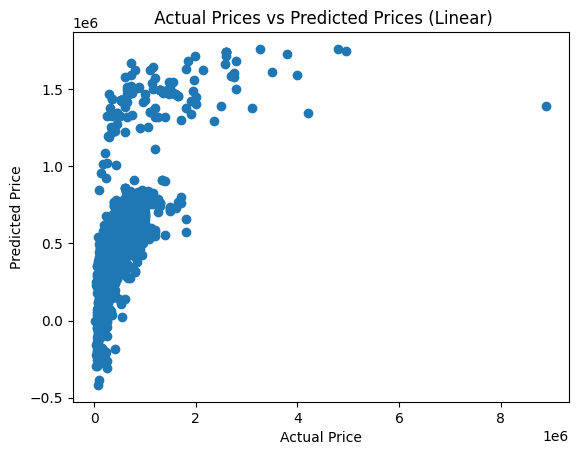

In [546]:
plt.scatter(y_test, y_pred_linear)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices (Linear)")
plt.show()

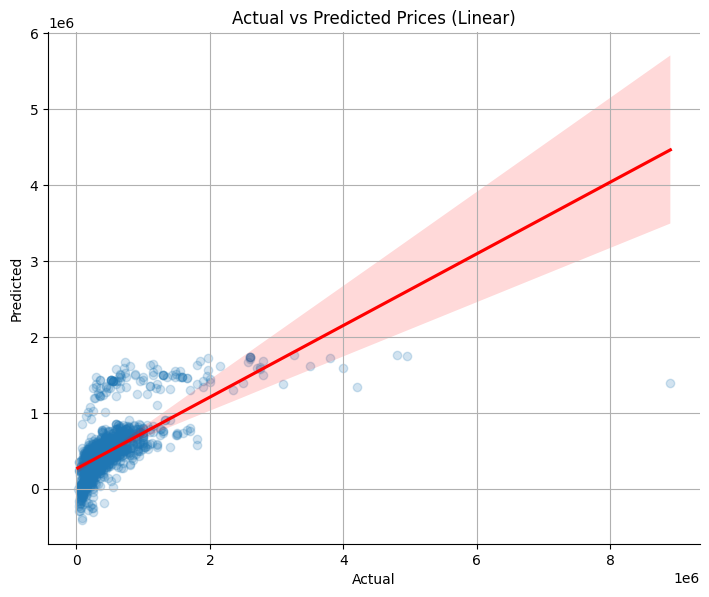

In [547]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_linear
})

# Plot using seaborn's lmplot
sns.lmplot(x='Actual', y='Predicted', data=df, height=6, aspect=1.2, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Prices (Linear)')
plt.grid(True)
plt.show()


# 2. Lasso Regression

In [556]:
model_lasso=Lasso(alpha=0.5)

In [557]:
model_lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [558]:
y_pred_lasso=model_lasso.predict(X_test)

In [559]:
# Evaluation Metrics
# Compute metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

# Print the regression report
print("Regression Report for Lasso Regression:")
print(f"R² Score:              {r2_lasso:.4f}")
print(f"Mean Absolute Error:   {mae_lasso:.4f}")
print(f"Mean Squared Error:    {mse_lasso:.4f}")
print(f"Root Mean Squared Error: {rmse_lasso:.4f}")

Regression Report for Lasso Regression:
R² Score:              0.4426
Mean Absolute Error:   219446.9302
Mean Squared Error:    164794680671.1476
Root Mean Squared Error: 405949.1109


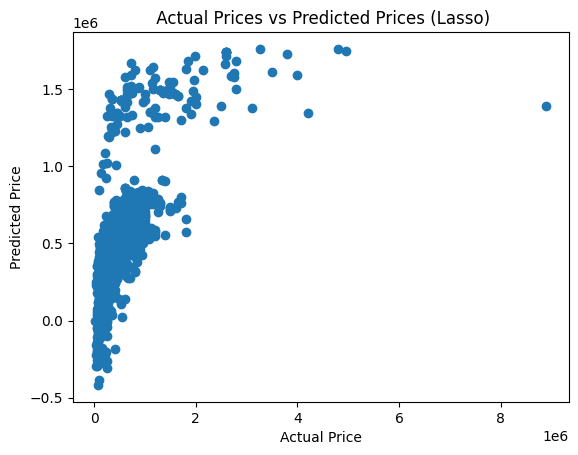

In [560]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices (Lasso)")
plt.show()

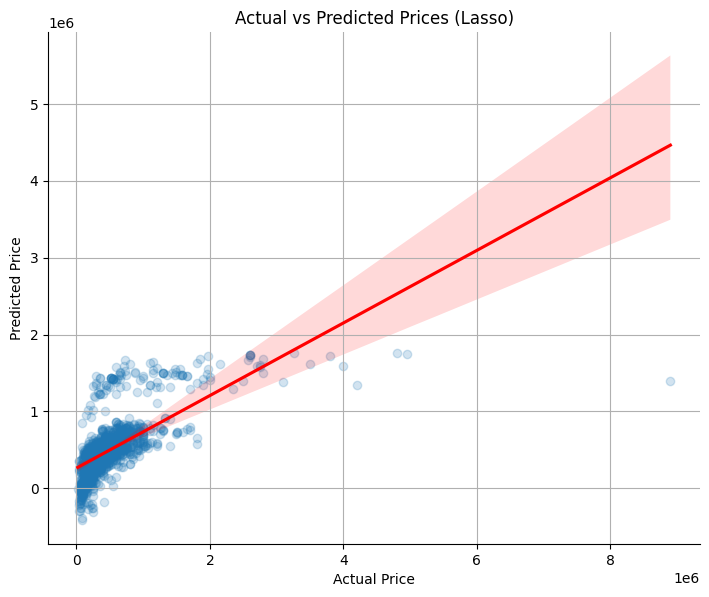

In [561]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with actual and predicted values
df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_lasso
})

# Plot using seaborn's lmplot
sns.lmplot(x='Actual Price', y='Predicted Price', data=df, height=6, aspect=1.2, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Prices (Lasso)')
plt.grid(True)
plt.show()


# Comparison Between Lasso Regression and Linear Regression using Pandas

In [562]:
import pandas as pd

comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'MAE', 'MSE', 'RMSE'],
    'Lasso Regression': [r2_lasso, mae_lasso, mse_lasso, rmse_lasso],
    'Linear Regression': [r2_linear, mae_linear, mse_linear, rmse_linear]
})

print("\nRegression Model Comparison:")
print(comparison_df.to_string(index=False, float_format="%.4f"))


Regression Model Comparison:
  Metric  Lasso Regression  Linear Regression
R² Score            0.4426             0.4426
     MAE       219446.9302        219447.0556
     MSE 164794680671.1476  164794708899.7787
    RMSE       405949.1109        405949.1457


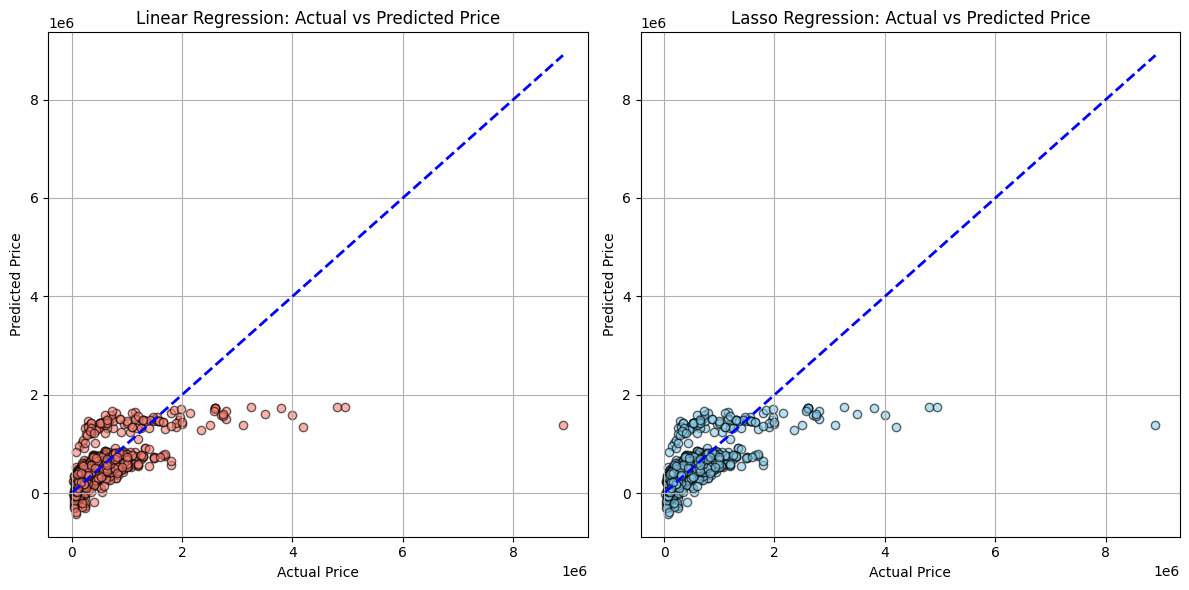

In [563]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='salmon', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Price')
plt.grid(True)

# Plot for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='skyblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso Regression: Actual vs Predicted Price')
plt.grid(True)

plt.tight_layout()
plt.show()


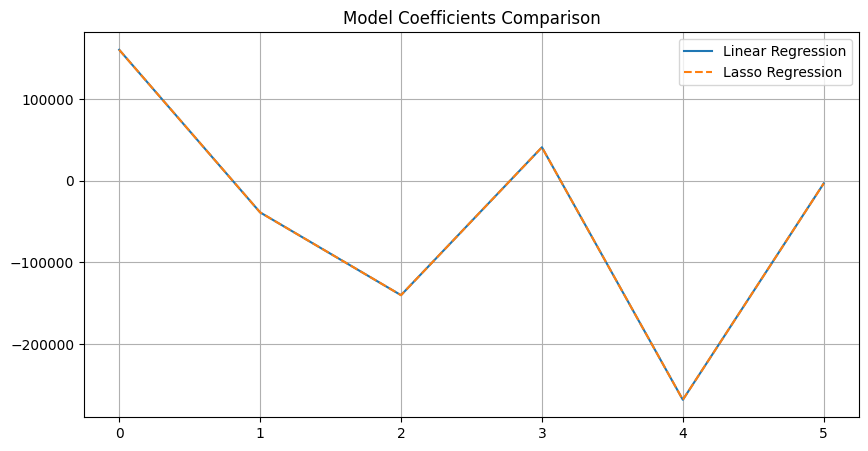

In [564]:
plt.figure(figsize=(10,5))
plt.plot(model_lin.coef_, label='Linear Regression')
plt.plot(model_lasso.coef_, label='Lasso Regression', linestyle='--')
plt.legend()
plt.title("Model Coefficients Comparison")
plt.grid(True)
plt.show()


# Model Summary

### Models Used:
- **Linear Regression**
- **Lasso Regression**

### Dataset:
- **Target Variable:** `selling_price`
- **Test Size:** 30%

### Evaluation Metrics:
- Both models evaluated using standard regression metrics: `R²`, `MAE`, `MSE`, and `RMSE`.

### Key Results:
- **R² Score:** 0.4426 (moderate predictive power)
- **Observation:** Both models performed **identically** across all metrics.

### Lasso Regression Insights:
- **No Feature Elimination or Regularization Observed**
- Reason: Dataset likely lacks **multicollinearity** or **irrelevant/noisy features**.
- Outcome: Lasso behaved like **plain Linear Regression**.

### Model Limitations & Opportunities for Improvement:
- **R² of 0.44** means the model explains only 44% of variance in `selling_price`.
- Potential Issues:
  - Missing key features (e.g., **car condition**, **mileage**, **region**)
  - **Nonlinear relationships** not captured by linear models
  - Possible **data quality or granularity** issues

### Conclusion:
Lasso did not enhance performance due to dataset characteristics. Further improvements require **better features** and/or **nonlinear modeling approaches**.

